![New York City schoolbus](schoolbus.jpg)

Photo by [Jannis Lucas](https://unsplash.com/@jannis_lucas) on [Unsplash](https://unsplash.com).
<br>

Every year, American high school students take SATs, which are standardized tests intended to measure literacy, numeracy, and writing skills. There are three sections - reading, math, and writing, each with a **maximum score of 800 points**. These tests are extremely important for students and colleges, as they play a pivotal role in the admissions process.

Analyzing the performance of schools is important for a variety of stakeholders, including policy and education professionals, researchers, government, and even parents considering which school their children should attend. 

You have been provided with a dataset called `schools.csv`, which is previewed below.

You have been tasked with answering three key questions about New York City (NYC) public school SAT performance.

In [43]:
import pandas as pd

# Read in the data
schools = pd.read_csv("schools.csv")

# Make a copy of the data to preserve the original dataset
schools_copy = schools.copy()

# Preview the data
print(schools_copy.head())
print(schools_copy.shape)
print(schools_copy.info())
print(schools_copy.duplicated().sum())
print(schools_copy.isnull().sum())

                                         school_name  ... percent_tested
0  New Explorations into Science, Technology and ...  ...            NaN
1                               Essex Street Academy  ...           78.9
2                       Lower Manhattan Arts Academy  ...           65.1
3    High School for Dual Language and Asian Studies  ...           95.9
4      Henry Street School for International Studies  ...           59.7

[5 rows x 7 columns]
(375, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   school_name      375 non-null    object 
 1   borough          375 non-null    object 
 2   building_code    375 non-null    object 
 3   average_math     375 non-null    int64  
 4   average_reading  375 non-null    int64  
 5   average_writing  375 non-null    int64  
 6   percent_tested   355 non-null    float64
dtypes: float

                                           school_name  average_math
88                              Stuyvesant High School           754
170                       Bronx High School of Science           714
93                 Staten Island Technical High School           711
365  Queens High School for the Sciences at York Co...           701
68   High School for Mathematics, Science, and Engi...           683
280                     Brooklyn Technical High School           682
333                        Townsend Harris High School           680
174  High School of American Studies at Lehman College           669
0    New Explorations into Science, Technology and ...           657
45                       Eleanor Roosevelt High School           641
                                           school_name  average_math
88                              Stuyvesant High School           754
170                       Bronx High School of Science           714
93                 Staten Island T

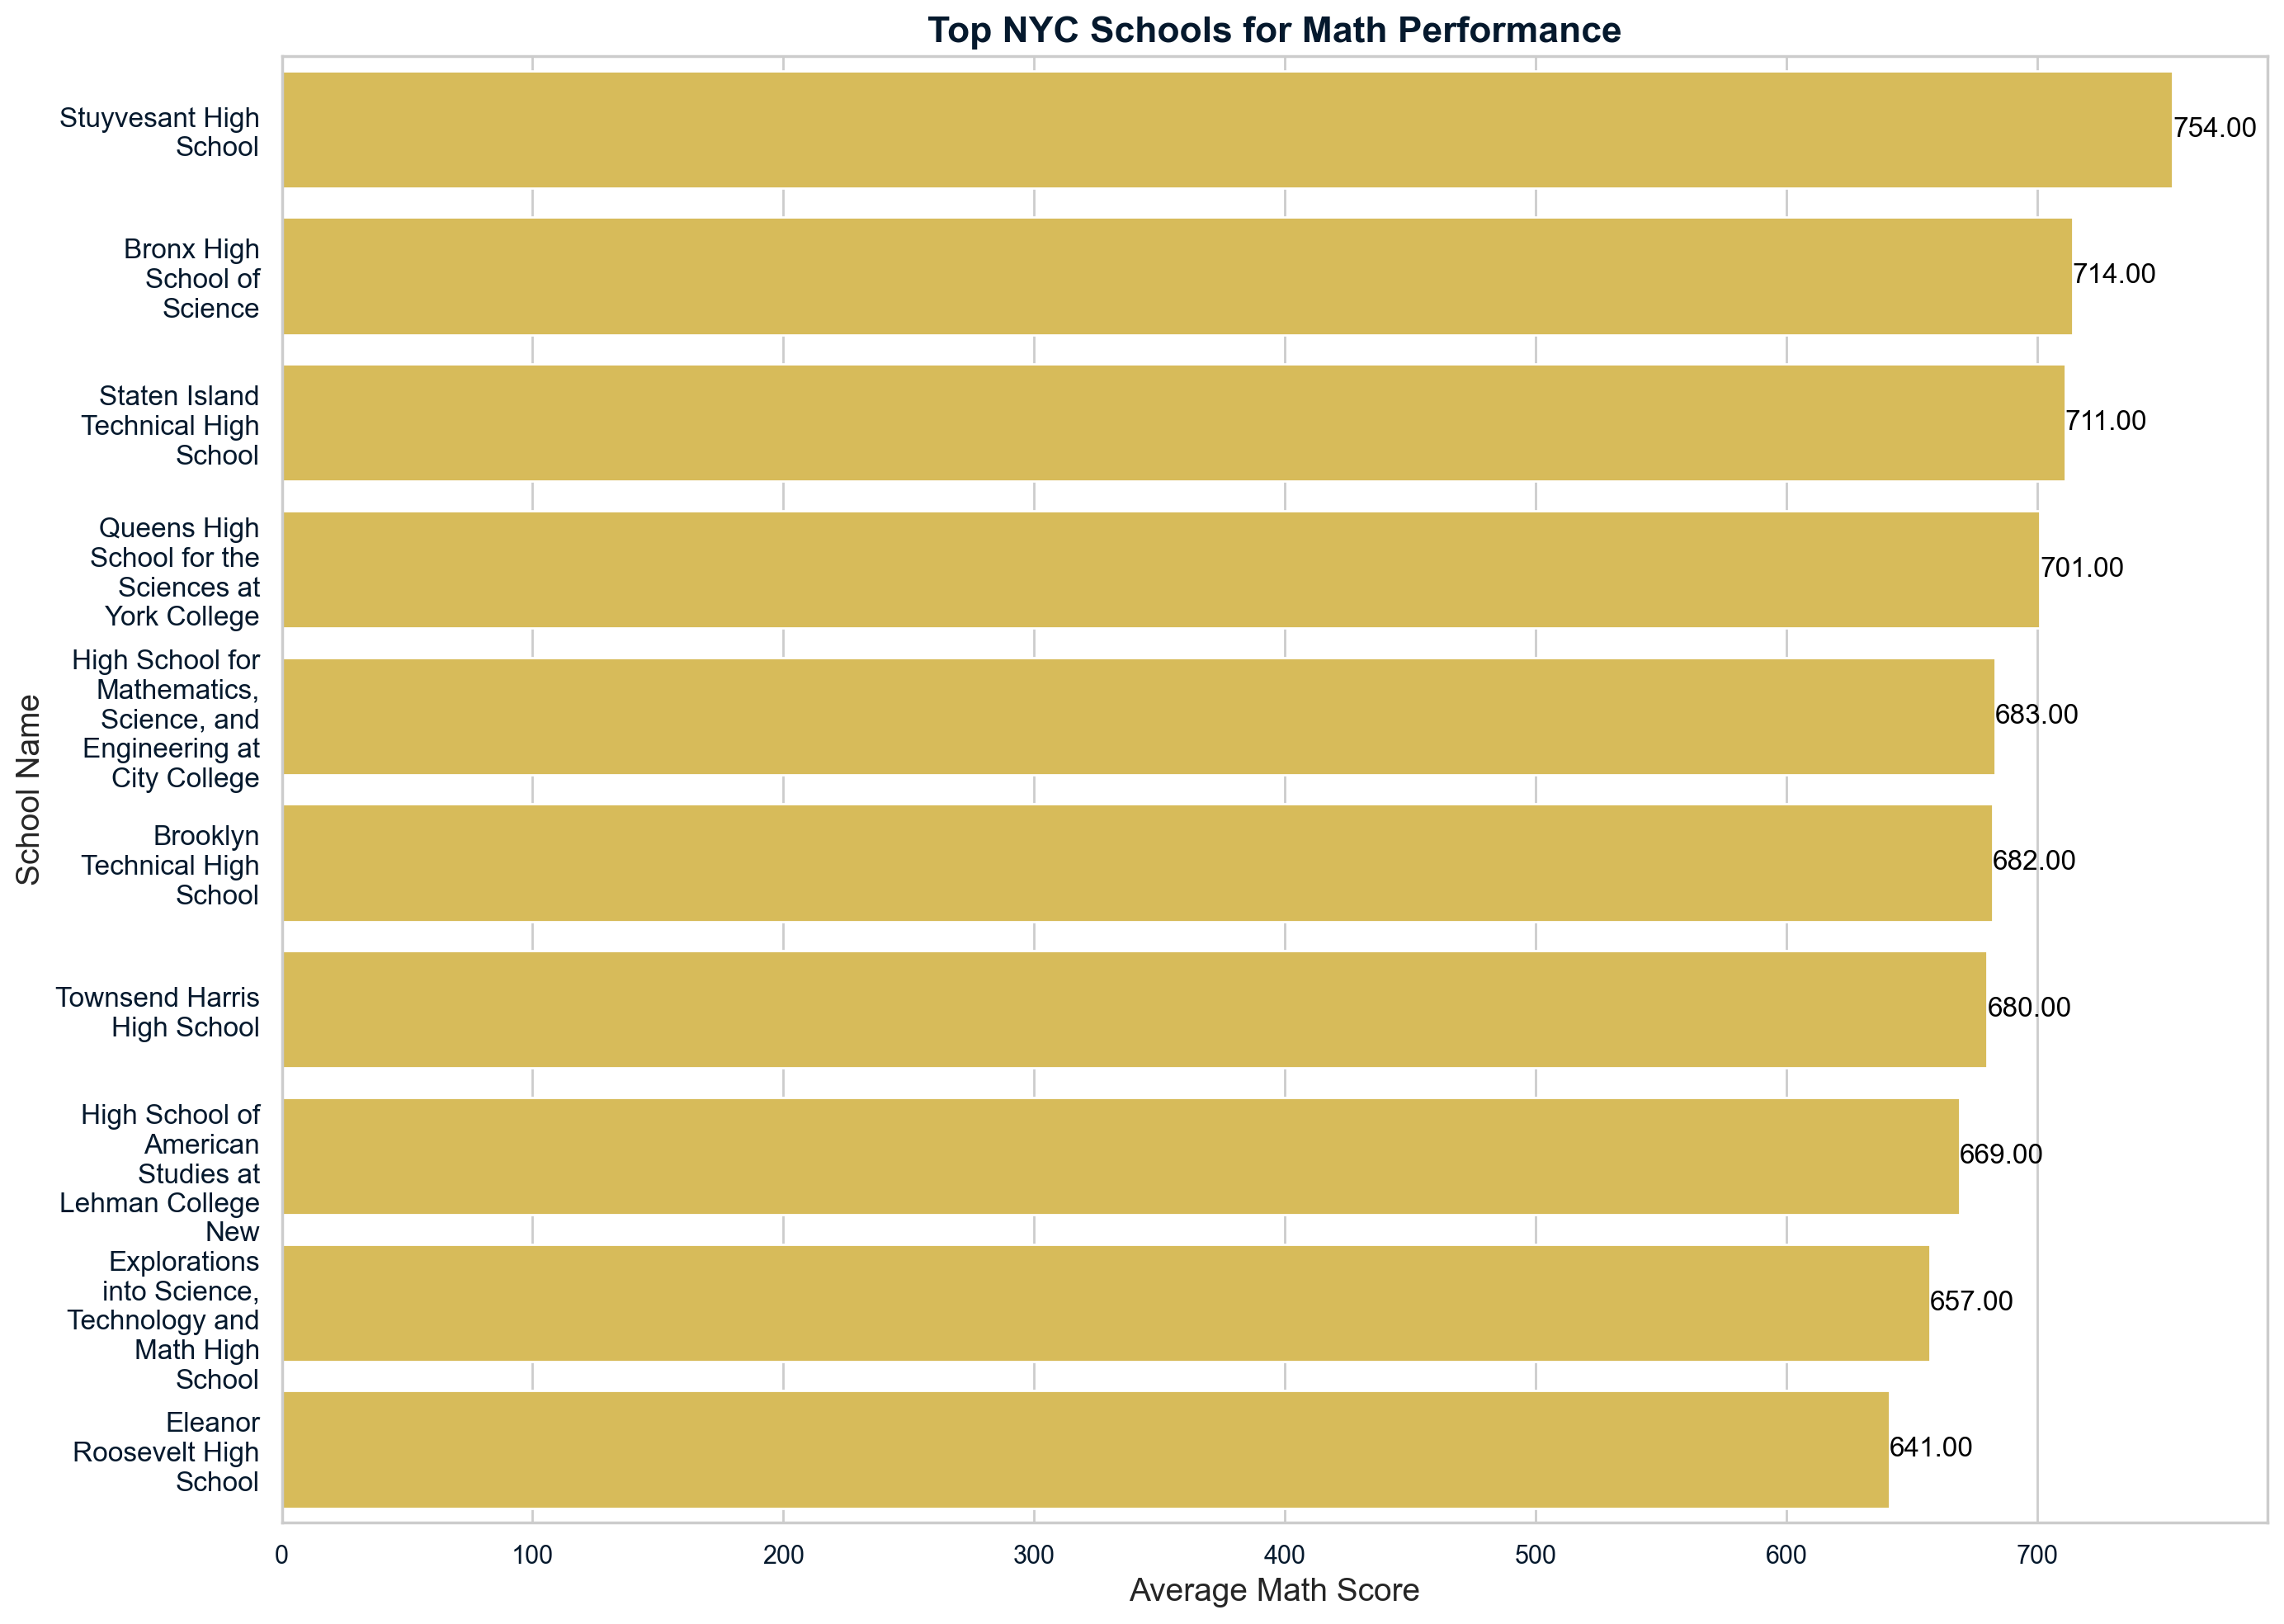

In [44]:
# Question 1: Which NYC schools have the best math results? 
# Objective process
# 1. Define threshold for "best" math results
# Ranges of score 0 and 800 (max possible score)
# "best" math score threshold = 80%
# 80% of 800 = 0.8×800 = 640

math_threshold = 0.8 * 800

# 2. Create a new dataframe for NYC schools that have the best math results.
# Filter schools with this boolean condition: average_math column >= math_threshold which is 640
# Filter out the dataframe with only the rows where the condition is satisfied: schools_copy[condition]

best_math_schools = schools_copy[schools_copy['average_math'] >= math_threshold]

# Sort by 'average_math' in descending order after filtering
best_math_schools_sorted = best_math_schools.sort_values(by='average_math', ascending=False)

# Select only the relevant columns: "school_name" and "average_math"
best_math_schools = best_math_schools_sorted[['school_name', 'average_math']]

# Display the result
print(best_math_schools)

# 3. Sort the values of average_math column in the created dataframe = best_math_schools, from highest to lowest (descending order)
best_math_schools_sorted = best_math_schools.sort_values(by='average_math', ascending=False)
print(best_math_schools_sorted)

# 4. After sorting, extract the top 10
top_10_math_schools = best_math_schools_sorted.head(10)
print(top_10_math_schools)

# 5. Visualize the data
# Create bar chart for the top_10_math_schools

import matplotlib.pyplot as plt
import seaborn as sns
import textwrap  # Import the textwrap module

# Set Seaborn style
sns.set(style="whitegrid")

# Function to wrap the text
def wrap_labels(labels, width=15):
    return [ '\n'.join(textwrap.wrap(label, width=width)) for label in labels]

# Define a custom color palette using the color code #ECC745
custom_palette = [ '#ECC745' ] * len(top_10_math_schools)

# Create a horizontal bar chart
plt.figure(figsize=(14, 10))  # Increase the figure size to reduce crowding
ax = sns.barplot(x="average_math", y="school_name", data=top_10_math_schools, palette=custom_palette)

# Add titles and labels
plt.title('Top NYC Schools for Math Performance', fontsize=16, fontweight='bold')
plt.xlabel('Average Math Score', fontsize=14)
plt.ylabel('School Name', fontsize=14)

# Wrap the school names in yticks
wrapped_labels = wrap_labels(top_10_math_schools['school_name'], width=15)
ax.set_yticklabels(wrapped_labels, fontsize=12)

# Add data labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}', 
                (p.get_x() + p.get_width(), p.get_y() + p.get_height() / 2.), 
                ha='left', va='center', fontsize=12, color='black')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


# 6. Insights
# "The top-performing school in math is Stuyvesant High School, with an average math score of 780. 
# The difference between the top school and the 10th-ranked school is 30 points, showing a relatively close competition among the best."





                                           school_name  total_SAT
88                              Stuyvesant High School       2144
170                       Bronx High School of Science       2041
93                 Staten Island Technical High School       2041
174  High School of American Studies at Lehman College       2013
333                        Townsend Harris High School       1981
365  Queens High School for the Sciences at York Co...       1947
5                       Bard High School Early College       1914
280                     Brooklyn Technical High School       1896
45                       Eleanor Roosevelt High School       1889
68   High School for Mathematics, Science, and Engi...       1889


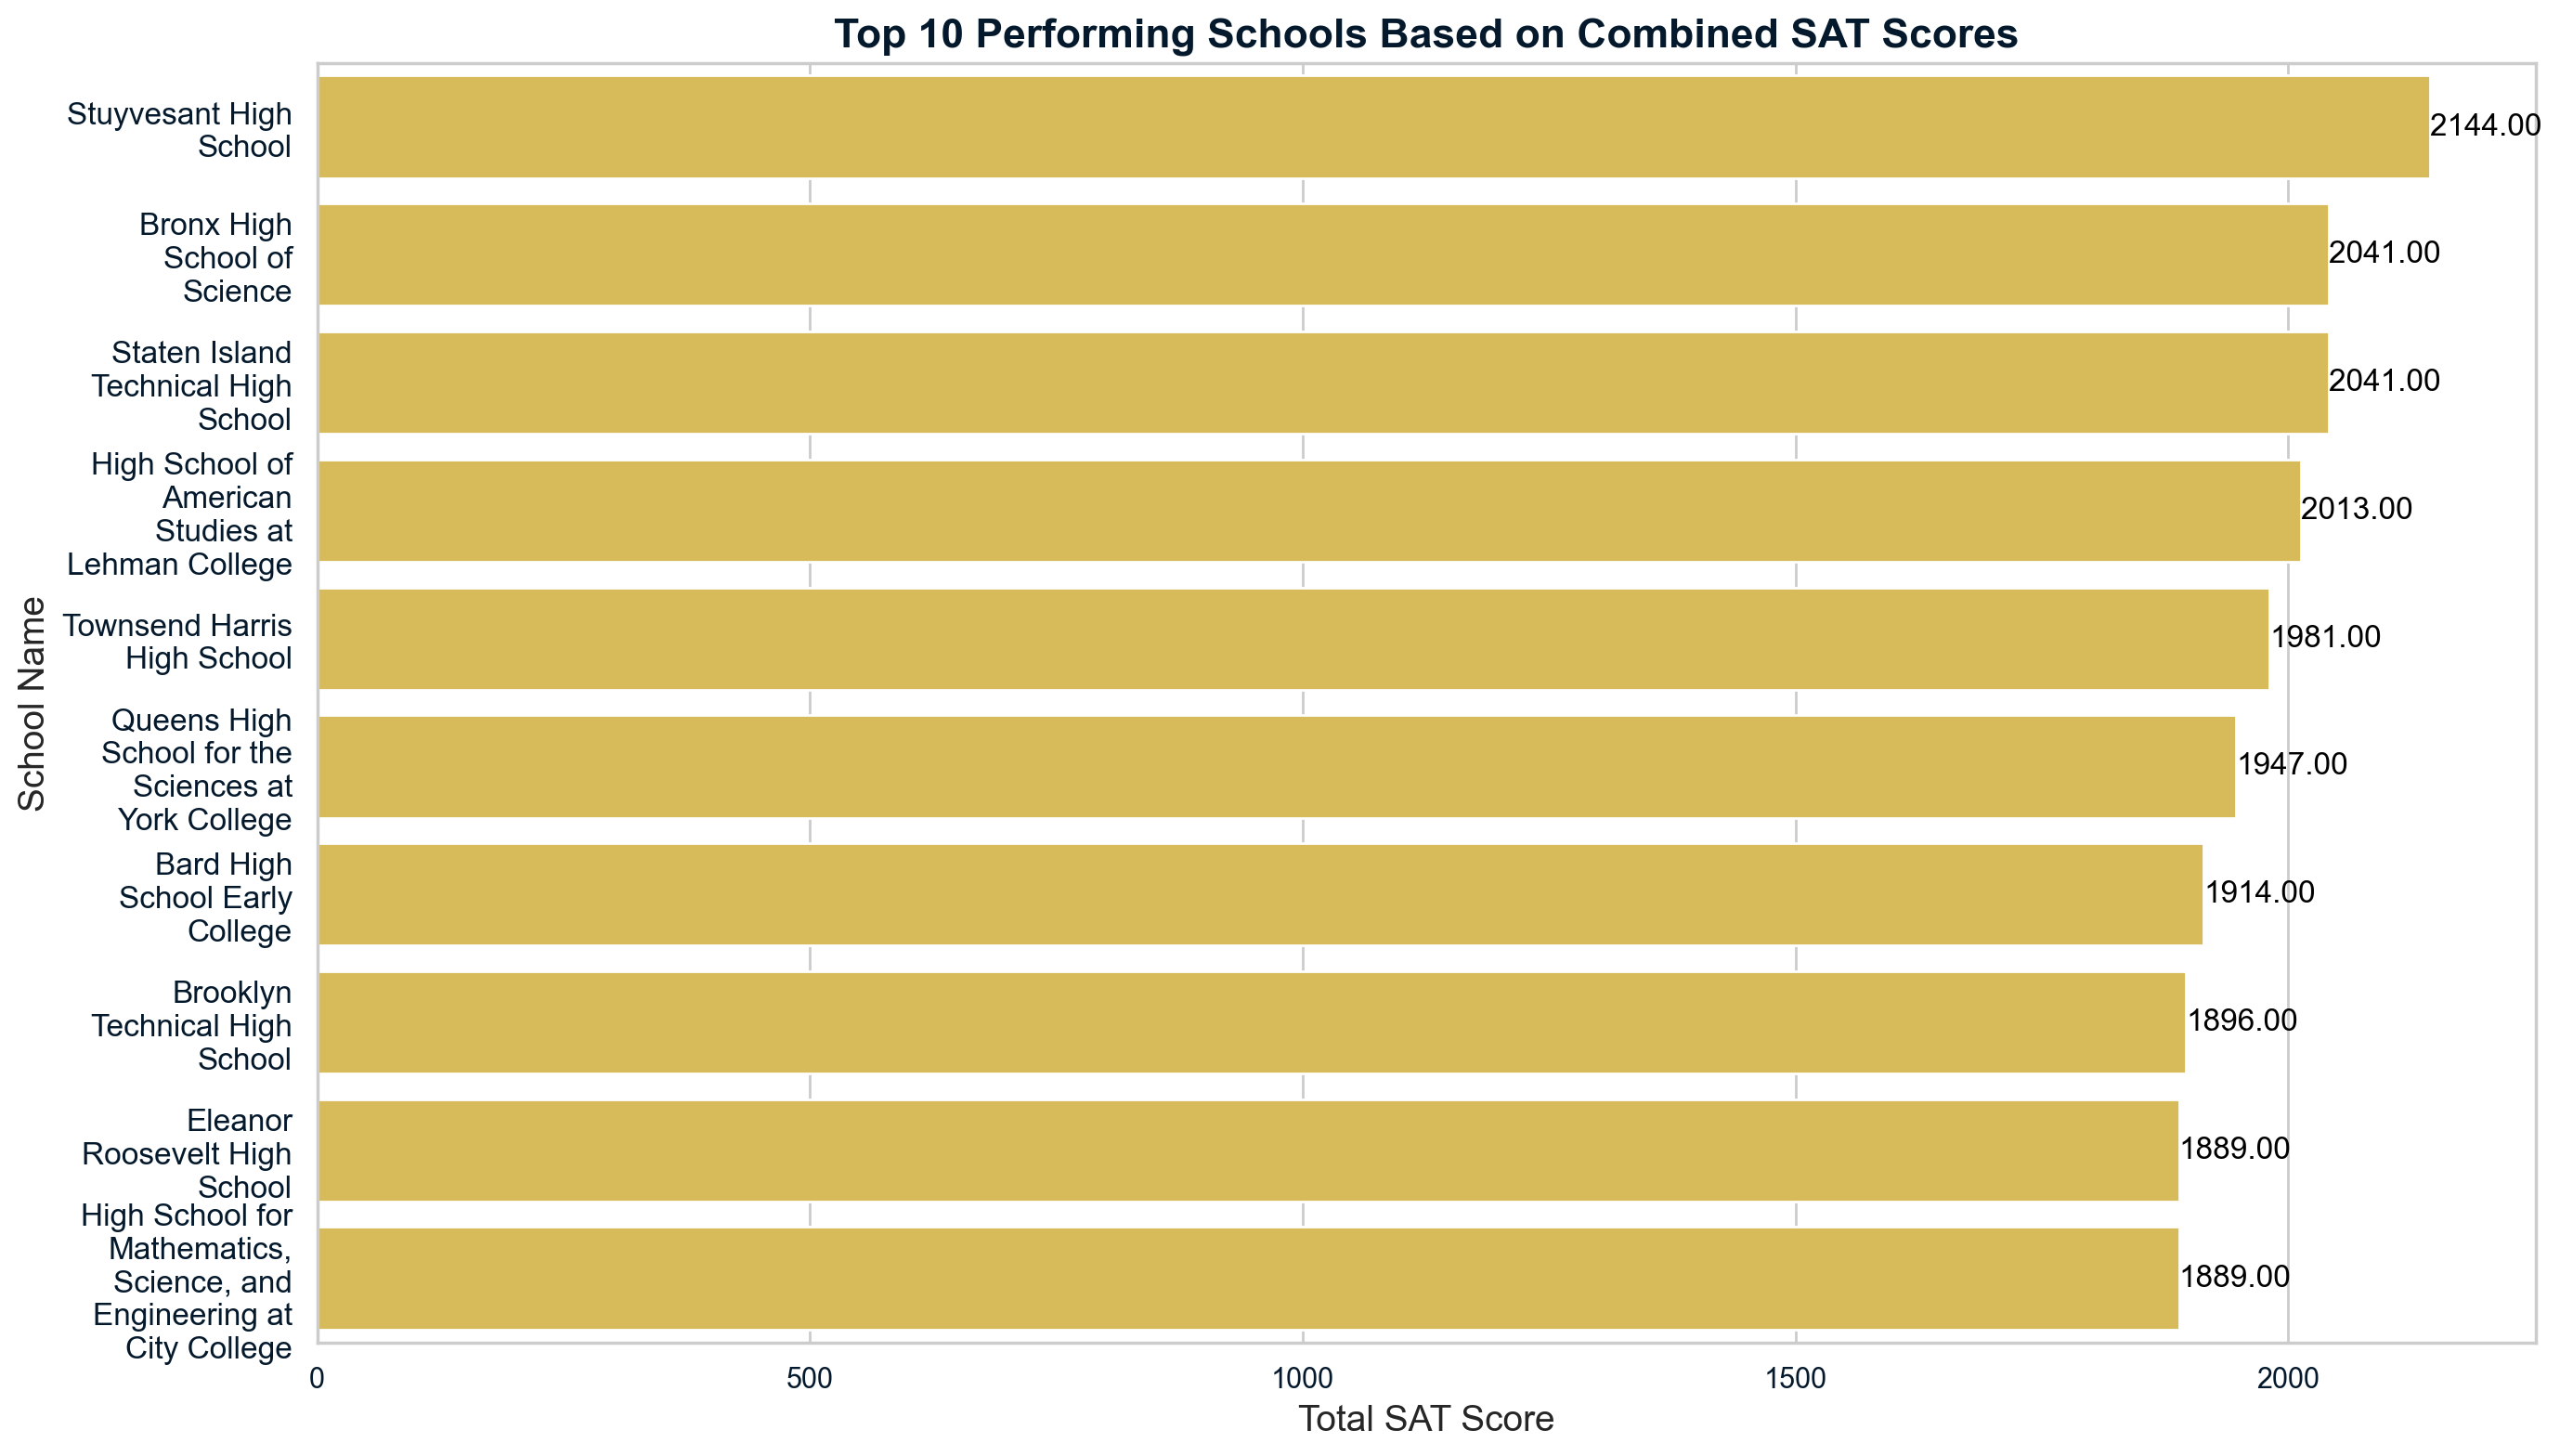

In [45]:
# Question 2: What are the top 10 performing schools based on the combined SAT scores?

# Objective process
#1. Create a new column 'Total_SAT' to the dataframe with the calculated total SAT score for each school (Pandas) 
# combined_score = average_math + average_reading + average_writing
schools_copy['total_SAT'] = schools_copy['average_math'] + schools_copy['average_reading'] + schools_copy['average_writing']

#2. Sort the dataframe by 'total_SAT' in descending order
top_schools_sorted = schools_copy.sort_values(by='total_SAT', ascending=False)

#3. Select the top 10 schools and include only the 'school_name' and 'total_SAT' columns
    # Display the result
top_10_schools = top_schools_sorted[['school_name', 'total_SAT']].head(10)
print(top_10_schools)

#5 Visualize the results

    # Visualization: Bar chart using Seaborn

import matplotlib.pyplot as plt
import seaborn as sns
import textwrap  # Import the textwrap module

# Function to wrap the text
def wrap_labels(labels, width=15):
    return [ '\n'.join(textwrap.wrap(label, width=width)) for label in labels]

# Set Seaborn style
sns.set(style="whitegrid")

# Create a horizontal bar chart for the top 10 schools based on SAT score
plt.figure(figsize=(14, 8))  # Increase figure size for better readability
ax = sns.barplot(x="total_SAT", y="school_name", data=top_10_schools, color='#ECC745')

# Add titles and labels
plt.title('Top 10 Performing Schools Based on Combined SAT Scores', fontsize=16, fontweight='bold')
plt.xlabel('Total SAT Score', fontsize=14)
plt.ylabel('School Name', fontsize=14)

# Wrap the school names in yticks
wrapped_labels = wrap_labels(top_10_schools['school_name'], width=15)
ax.set_yticklabels(wrapped_labels, fontsize=12)

# Add data labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}', 
                (p.get_x() + p.get_width(), p.get_y() + p.get_height() / 2.), 
                ha='left', va='center', fontsize=12, color='black')

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()




         borough  std_SAT  average_SAT  num_schools
0          Bronx   150.39      1202.72           98
1       Brooklyn   154.87      1230.26          109
2      Manhattan   230.29      1340.13           89
3         Queens   195.25      1345.48           69
4  Staten Island   222.30      1439.00           10


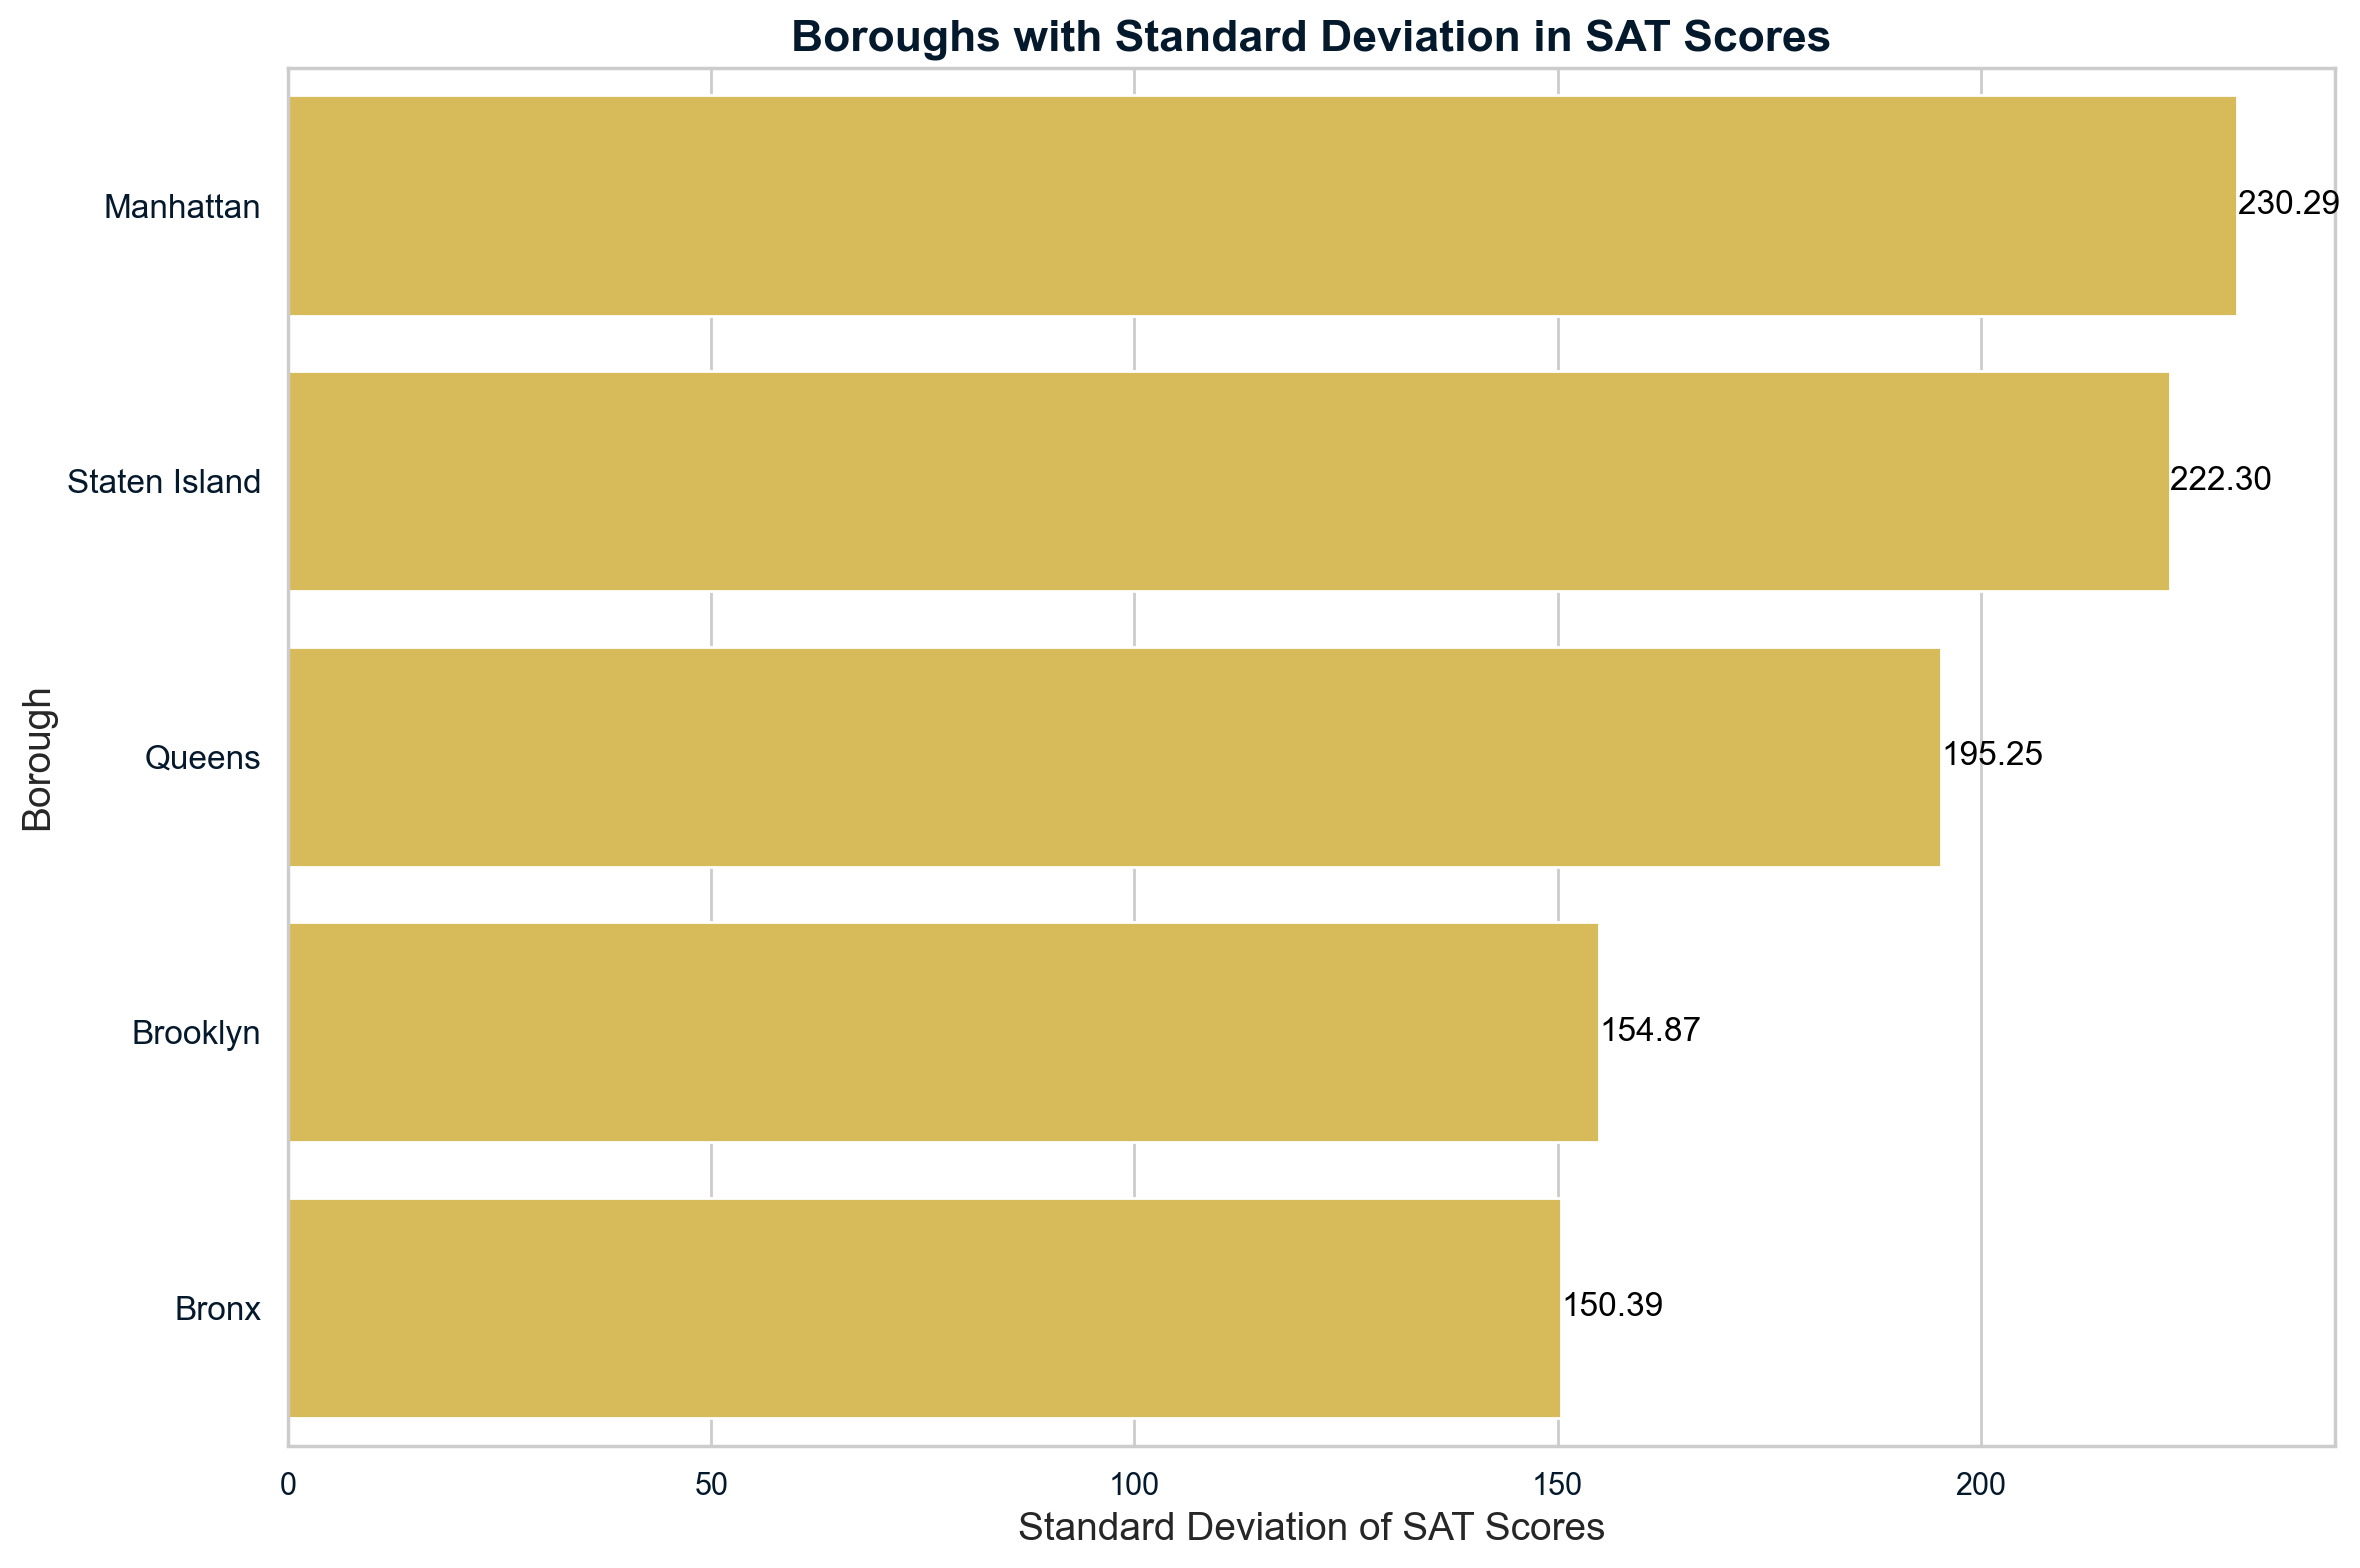

There are 5 boroughs in the dataset.
Boroughs: ['Manhattan' 'Staten Island' 'Bronx' 'Queens' 'Brooklyn']


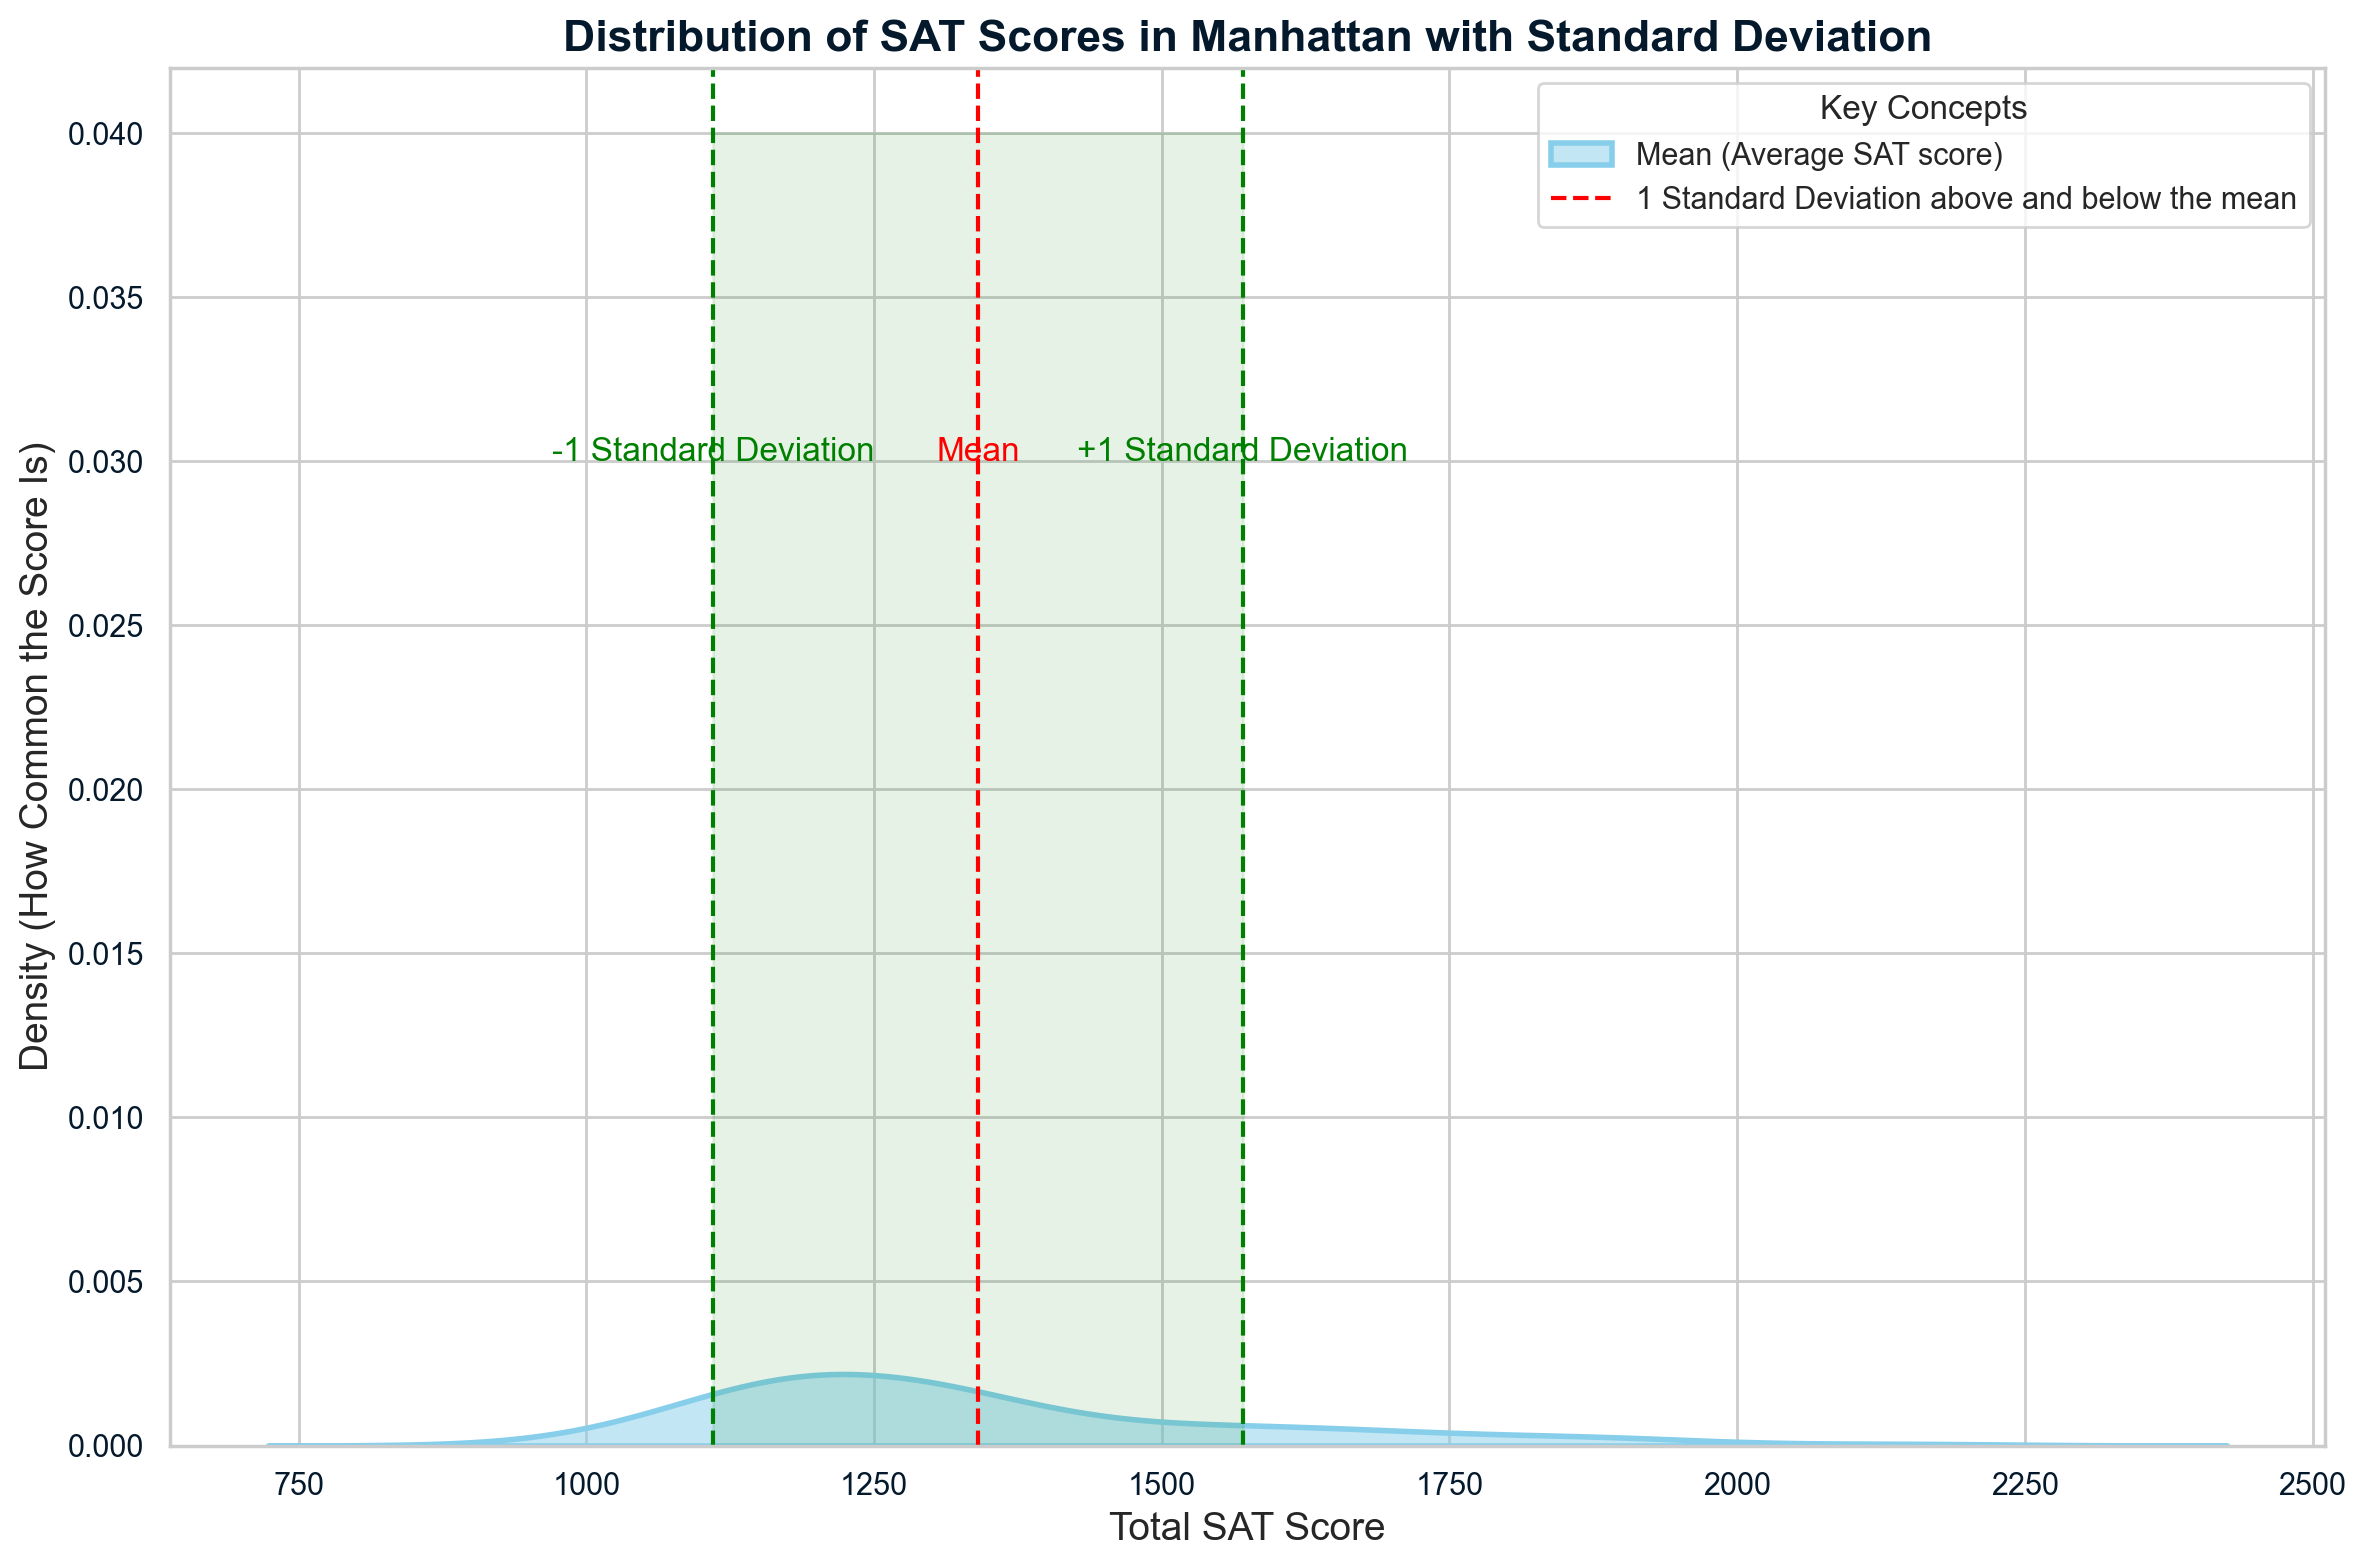

In [49]:
# Question 3: Which single borough has the largest standard deviation in the combined SAT score?

# Step 1: Group data by 'borough' and calculate required statistics
borough_stats = schools_copy.groupby('borough')['total_SAT'].agg(
    std_SAT='std',       # Standard deviation of total_SAT
    average_SAT='mean',  # Mean of total_SAT
    num_schools='count'  # Count of schools in each borough
).reset_index()

# Round all numeric values to two decimal places
borough_stats = borough_stats.round(2)

# Display the result (All boroughs with their stats)
print(borough_stats)

# --- Plotting the Results ---

import matplotlib.pyplot as plt
import seaborn as sns
import textwrap  # Import the textwrap module

# Function to wrap the text
def wrap_labels(labels, width=15):
    return [ '\n'.join(textwrap.wrap(label, width=width)) for label in labels]

# Ensure 'borough' is a categorical variable for proper plotting
borough_stats['borough'] = borough_stats['borough'].astype(str)

# Sort boroughs by standard deviation to show the largest first
borough_stats = borough_stats.sort_values(by="std_SAT", ascending=False)

# Set Seaborn style
sns.set(style="whitegrid")

# Create the bar plot with improved aesthetics
plt.figure(figsize=(12, 8))

# Set the color to #ECC745
ax = sns.barplot(x="std_SAT", y="borough", data=borough_stats, color='#ECC745')

# Add titles and labels
plt.title('Boroughs with Standard Deviation in SAT Scores', fontsize=16, fontweight='bold')
plt.xlabel('Standard Deviation of SAT Scores', fontsize=14)
plt.ylabel('Borough', fontsize=14)

# Wrap the borough names in yticks
wrapped_labels = wrap_labels(borough_stats['borough'], width=15)
ax.set_yticklabels(wrapped_labels, fontsize=12)

# Add value annotations to each bar for better understanding
for index, value in enumerate(borough_stats['std_SAT']):
    plt.text(value + 0.1, index, f'{value:.2f}', color='black', ha="left", va="center", fontsize=12)

# Show the plot with a tight layout
plt.tight_layout()
plt.show()


unique_boroughs = schools_copy['borough'].unique()

# Display the number of unique boroughs
print(f"There are {len(unique_boroughs)} boroughs in the dataset.")

# Display the list of boroughs
print("Boroughs:", unique_boroughs)

schools.to_csv('school.csv', index=False)

# Filter the data for Manhattan (or any other borough of interest)
borough_of_interest = 'Manhattan'
borough_data = schools_copy[schools_copy['borough'] == borough_of_interest]

# Create the plot for the distribution of total SAT scores
plt.figure(figsize=(12, 8))

# Plot a Kernel Density Estimate (KDE) for the distribution of SAT scores
sns.kdeplot(borough_data['total_SAT'], shade=True, color="skyblue", alpha=0.5, linewidth=2)

# Calculate the mean and standard deviation of SAT scores for the specific borough
mean_sat = borough_data['total_SAT'].mean()
std_sat = borough_data['total_SAT'].std()

# Plot a vertical line for the mean
plt.axvline(mean_sat, color='red', linestyle='--', label=f'Mean (Average SAT): {mean_sat:.2f}')

# Plot vertical lines for one standard deviation above and below the mean
plt.axvline(mean_sat + std_sat, color='green', linestyle='--', label=f'Mean + 1 Std Dev: {mean_sat + std_sat:.2f}')
plt.axvline(mean_sat - std_sat, color='green', linestyle='--', label=f'Mean - 1 Std Dev: {mean_sat - std_sat:.2f}')

# Optionally, shade the region between one standard deviation below and above the mean
plt.fill_betweenx([0, 0.04], mean_sat - std_sat, mean_sat + std_sat, color="green", alpha=0.1)

# Add simple explanations as text annotations to make it more beginner-friendly
plt.text(mean_sat, 0.03, 'Mean', color='red', ha='center', fontsize=12)
plt.text(mean_sat + std_sat, 0.03, '+1 Standard Deviation', color='green', ha='center', fontsize=12)
plt.text(mean_sat - std_sat, 0.03, '-1 Standard Deviation', color='green', ha='center', fontsize=12)

# Title and labels
plt.title(f'Distribution of SAT Scores in {borough_of_interest} with Standard Deviation', fontsize=16, fontweight='bold')
plt.xlabel('Total SAT Score', fontsize=14)
plt.ylabel('Density (How Common the Score Is)', fontsize=14)

# Add a simple legend with explanations for each line
plt.legend(title="Key Concepts", labels=[
    "Mean (Average SAT score)", 
    "1 Standard Deviation above and below the mean"
])


# Show the plot
plt.tight_layout()
plt.show()


